In [60]:
# import necessary modules
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# use seaborn plotting defaults
import seaborn as sns; sns.set()

import pandas as pd

import plotly.express as px
import numpy as np

from sklearn import svm
from sklearn.datasets import make_classification


In [61]:
X, y = make_classification(n_features=2, random_state=1, n_samples=4, n_redundant=0)
y
clf = svm.LinearSVC(random_state=0, tol=1e-5, loss='hinge')
clf.fit(X, y)
print(clf.coef_)
print(clf.intercept_)
print(clf.predict(X))

array([0, 0, 1, 1])

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
          penalty='l2', random_state=0, tol=1e-05, verbose=0)

[[0.30202025 1.03777904]]
[-0.60320556]
[0 0 1 1]


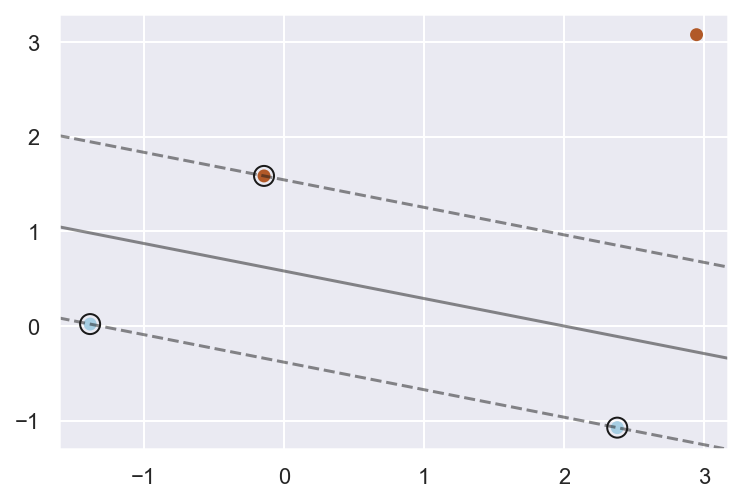

In [62]:
decision_function = clf.decision_function(X)
# we can also calculate the decision function manually
# decision_function = np.dot(X, clf.coef_[0]) + clf.intercept_[0]
support_vector_indices = np.where((2 * y - 1) * decision_function <= 1)[0]
support_vectors = X[support_vector_indices]
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),
                     np.linspace(ylim[0], ylim[1], 50))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
            linestyles=['--', '-', '--'])
plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=100,
            linewidth=1, facecolors='none', edgecolors='k');

The learning algorithm needs to learn `coef_` and `intercept_` from the data.

In [63]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

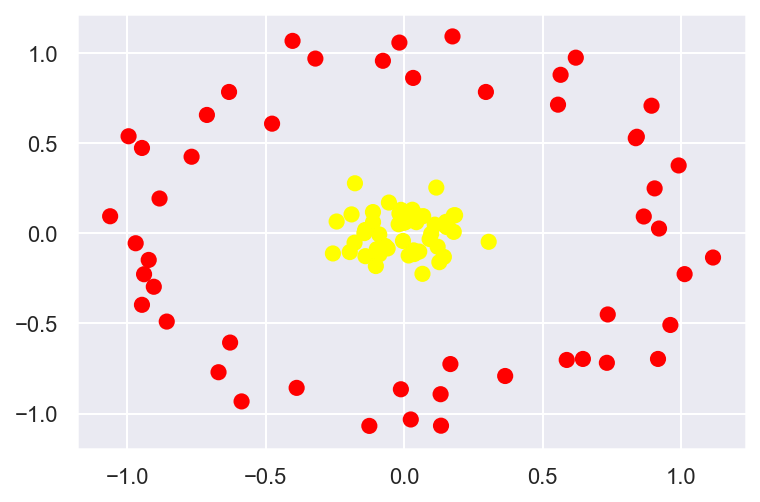

In [64]:
from sklearn.datasets import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

clf = svm.SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

In [65]:
r = np.exp(-(X ** 2).sum(1))
df = pd.DataFrame(np.hstack((X, r.reshape(-1,1), y.reshape(-1,1))))
df.columns = ['x1', 'x2', 'r', 'label']
df = df.astype({'label': int})
df = df.astype({'label': 'category'})
df

,x1,x2,r,label
0,0.120706,-0.074882,0.980025,1
1,0.619387,0.973576,0.264084,0
2,-0.921964,-0.148080,0.418138,0
3,0.183742,0.099873,0.957207,1
4,0.016117,-0.123285,0.984660,1
...,...,...,...,...
95,-0.093302,-0.088125,0.983664,1
96,-0.994665,0.537753,0.278445,0
97,-0.139785,-0.127229,0.964903,1
98,0.839705,0.534962,0.371098,0


In [66]:
fig = px.scatter_3d(df, x="x1", y="x2", z="r", color="label")
fig.show()

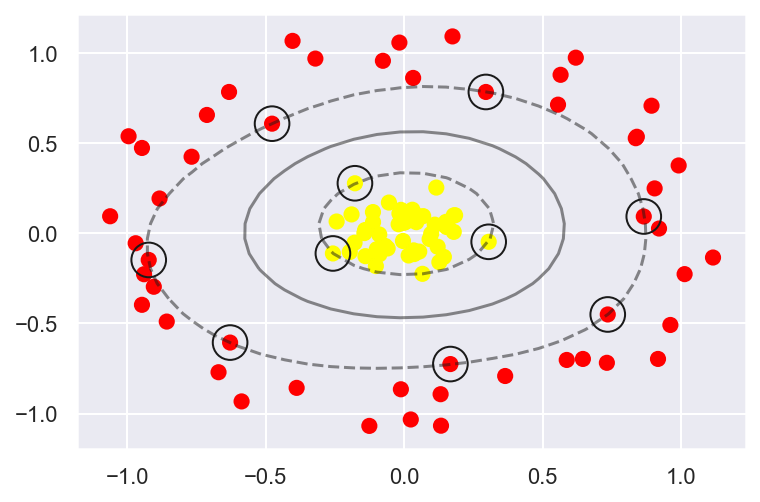

In [67]:
clf = svm.SVC(kernel='rbf', C=1E6, random_state=0)
clf.fit(X, y)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none', edgecolors='k');

In [68]:
c = [-13, -23]
A = [[5,15],
     [4, 4],
     [35, 20]]
b = [480,160,1190]
from scipy.optimize import linprog
res = linprog(c, A_ub = A, b_ub = b, method='revised simplex')
res

     con: array([], dtype=float64)
     fun: -800.0
 message: 'Optimization terminated successfully.'
     nit: 2
   slack: array([  0.,   0., 210.])
  status: 0
 success: True
       x: array([12., 28.])

In [69]:
from sklearn.datasets import load_iris
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['Target'] = pd.DataFrame(data.target)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
